# Importing the required libraries

In [267]:
pwd 

'/home/wsuser/work'

In [268]:
!pip install tensorflow==2.10.1
!pip install keras

In [269]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

# Load data

In [270]:
pwd

'/home/wsuser/work'

In [273]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

In [274]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [275]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

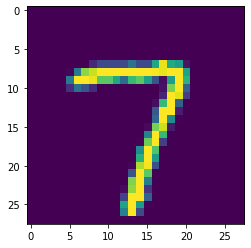

In [276]:
plt.imshow(x_train[5100])     #ploting the index=image

In [277]:
np.argmax(y_train[5100])

0

# Reshaping Dataset

In [278]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

# Applying One Hot Encoding

In [279]:
number_of_classes = 10  #storing the no of classes in a variable

In [280]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

# Add CNN Layers

In [281]:
#create model
model=Sequential ()

In [282]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [283]:
#flatten the dimension of the image
model.add(Flatten())

In [284]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling the model

In [285]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [286]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Train the model

In [287]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 110s 59ms/step - loss: 0.2894 - accuracy: 0.9462 - val_loss: 0.0888 - val_accuracy: 0.9727
Epoch 2/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0713 - accuracy: 0.9779 - val_loss: 0.0801 - val_accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0775 - val_accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0949 - val_accuracy: 0.9756
Epoch 5/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0960 - val_accuracy: 0.9769


In [288]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09601911157369614, 0.9768999814987183]


# Test The Model

In [289]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 56ms/step
[[1.2531641e-13 1.0887829e-12 1.7133087e-11 6.5239711e-08 1.3687310e-03
  2.6285286e-07 1.6152878e-13 3.3611202e-06 6.6508874e-06 9.9862087e-01]]


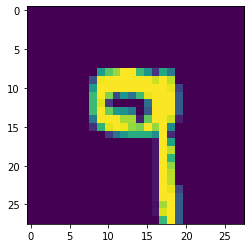

In [290]:
plt.imshow(x_test[6000])

In [291]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [292]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

# Save The model

In [293]:
# Save the model
model.save('models/mnistCNN.h5')

In [294]:
cd models

/home/wsuser/work/models


In [295]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [296]:

ls

hdr_deployment.tgz  mnistCNN.h5


In [297]:
ls -1

hdr_deployment.tgz
mnistCNN.h5


In [298]:
!pip install watson-machine-learning-client --upgrade

# Cloud deploy

In [299]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"MqHTAW4tYYoGQrfbnLNY0HGMlfAPNji3SQGR3LDyrKf8"
}
client = APIClient(credentials)
client

In [300]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/53f0070c9f8342068a125643c8c5dba8:4005aebb-8857-465a-8b81-d3cabcb43199::',
      'guid': '4005aebb-8857-465a-8b81-d3cabcb43199',
      'name': 'Watson Machine Learning-hn',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'HDR',
    'scope': {'bss_account_id': '53f0070c9f8342068a125643c8c5dba8'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '05410e23-885e-4aea-ab46-bd5c980add3c',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '0fe9b17e1caf44d486fdf31d5c1b0451',
        'api_key': 'iDHfkdKAr2v3bD9Xf6NchPiXIRzxevPndZ4semfuaNEm',
        'secret_access_key': 'e8a94be0b14a6149ddc85ff279e45345bcb1e26f75f06e41',
        'service_id': 'ServiceId-2688c6b0-2a8e-49ca-a03d-1cd07e3677ab'},
       'editor': {'access_key_id': '30d351ba54b14dcc8b64f9fca1b80ac0',
        'api_key': 'V6Qz9

In [301]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [302]:
space_uid = guid_from_space_name(client,'HDR')
print("Space UID = " + space_uid)

Space UID = 489a7174-99b0-4f01-ba93-a4e7b5bfa667


In [303]:
client.set.default_space(space_uid)

'SUCCESS'

In [304]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [305]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [306]:
model_details = client.repository.store_model(model='hdr_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [307]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-17T08:33:37.850Z',
  'id': '795ac89d-f920-4574-831e-c8b4c64d6366',
  'modified_at': '2022-11-17T08:33:40.234Z',
  'name': 'Digit Recognition System',
  'owner': 'IBMid-6610045EEK',
  'resource_key': '03ba8715-356c-4fdf-9887-fbac8d84184b',
  'space_id': '489a7174-99b0-4f01-ba93-a4e7b5bfa667'},
 'system': {'warnings': []}}

In [308]:
model_id = client.repository.get_model_id(model_details)
model_id

'795ac89d-f920-4574-831e-c8b4c64d6366'

In [309]:
client.repository.download(model_id,'DigitRecog_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_model.tar.gz'


'/home/wsuser/work/models/DigitRecog_model.tar.gz'

In [310]:
ls

DigitRecog_model.tar.gz  hdr_deployment.tgz  mnistCNN.h5


# Test Model

In [311]:
ls

DigitRecog_model.tar.gz  hdr_deployment.tgz  mnistCNN.h5


In [312]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [313]:
model = load_model("mnistCNN.h5")

In [314]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FC4HUfpH_E3tzAFaRuGmBwNDdU8BT1QE4tXyhPONdHpJ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittentodigitrecognization-donotdelete-pr-eu49fdngran081'
object_key = '1.jpg'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [316]:
img = Image.open(streaming_body_4).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [318]:
img

In [319]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [320]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 60ms/step
[[3.9755403e-09 9.6393669e-01 1.1939642e-05 3.2143249e-05 3.8836201e-04
  3.0695106e-04 5.7371217e-08 3.2050673e-02 2.9014174e-05 3.2442377e-03]]


In [321]:
print(np.argmax(pred, axis=1)) #printing our Labels

[1]
